## szeregi fouriera


### rozwinięcie w szereg fouriera funkcji:
s(t) = {2 dla [0, T], 0 dla [-T, 0]}

In [1]:
import numpy as np

# oś czasu t - 10k probek
t = np.linspace(-10, 10, 10000)

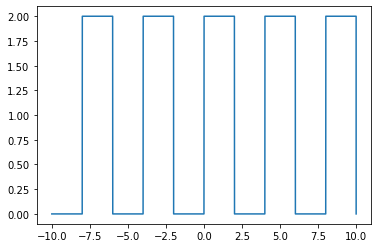

In [2]:
# wygenerowanie sygnału s(t)
import scipy
from scipy import signal
import matplotlib.pyplot as plt

y =scipy.signal.square(np.pi/2 * t) + 1

# wykres:
plt.plot(t, y)

In [3]:
# szereg Fouriera:
from math import pi, sin, cos

K = 10
y2 = 0

def fourier_series(t, K, T):
    y = np.zeros(len(t))
    a = np.zeros(K)
        
    for i in range(0, len(y)):
        for k in range(1, K):
            a[k-1] = (2/(pi*k)) * (sin(k*pi)*cos(k*pi*t[i]/T) + (1-cos(k*pi))*sin(k*pi*t[i]/T))
            #print('a = ', a[k-1])
        y[i] = sum(a)  + 2/T
        #print('y = ', y[i])
    return y

T = 2
suma = fourier_series(t, K, T)



[1.         0.97999909 0.96000469 ... 1.03999531 1.02000091 1.        ]


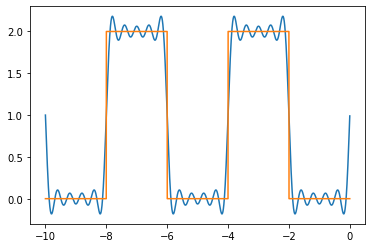

In [4]:
plt.plot(t[0:5000], suma[0:5000], t[0:5000], y[0:5000])
print(suma)

[1.         0.97999909 0.96000469 ... 1.03999531 1.02000091 1.        ]


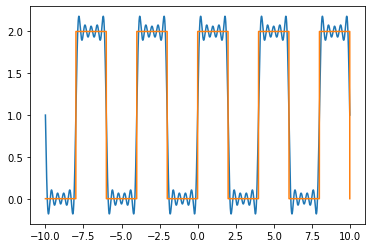

In [5]:
plt.plot(t, suma, t, y)
print(suma)

### Dyskretne przekształcenie Fouriera


In [29]:
from cmath import exp, pi

def mydft(signal):
    N = len(signal)
    tmp = np.zeros(len(signal), dtype=np.complex_)
    Signal = np.zeros(len(signal), dtype=np.complex_)
    
    for n in range(0, len(signal)):
        for k in range(0, len(signal)):
            x = -1j*2*pi*n*k/N
            tmp[k] = signal[k] * exp(x)
        Signal[n] = sum(tmp)
        
    return Signal

In [30]:
def myidft(signal):
    N = len(signal)
    tmp = np.zeros(len(signal), dtype=np.complex_)
    Signal = np.zeros(len(signal), dtype=np.complex_)
    
    for k in range(0, len(signal)):
        for n in range(0, len(signal)):
            x = 1j*2*pi*n*k/N
            tmp[n] = signal[n] * exp(x)
        Signal[k] = sum(tmp)*1/N
        
    return Signal

In [31]:
def cosinus(A, f, tp, tk, fp, phi):
    """
    Ta funkcja zwraca dwa wektory - wektor czasu oraz wektor sygnału 
    
    Dane wejściowe:
    A - amplituda sygnału
    f - częstotliwość sygnału
    tp - czas początkowy sygnału
    tk - czas końcowy sygnału
    fp - częstotliwość próbkowania sygnału
    phi - przesunięcie sygnału
    
    Dane wyjściowe:
    x - wektor czasu
    y - sygnał
    """
    
    x = np.arange(tp, tk, 1/fp)
    y = [cos(2*pi*f*T+phi) for T in x]
    return x, y

C:\Users\X\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


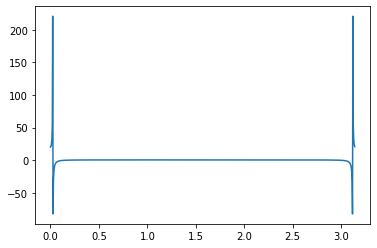

In [33]:
x, y = cosinus(1, 2, 0, pi, 256, 0)
y_dft = mydft(y)
y_idft = myidft(y_dft)

# rysowanie wykresów
#plt.plot(x, y, x, y_idft, 'r--')
plt.plot(x, y_dft)



In [10]:
from cmath import sqrt, atan

# amplituda sygnału
s_re = y_dft.real
s_im = y_dft.imag
amplituda = np.zeros(len(y_dft), dtype=np.complex_)

for i in range(len(y_dft)):
    amplituda[i] = sqrt(s_re[i]**2 + s_im[i]**2)

# faza sygnału
faza = np.zeros(len(y_dft), dtype=np.complex_)

for i in range(len(y_dft)):
    faza[i] = atan(s_re[i]/s_im[i]**2)



C:\Users\X\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


C:\Users\X\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


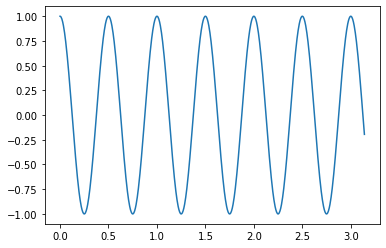

In [11]:
plt.plot(x, y_idft)

In [12]:

a = [1, 1, 2, 3, 1]
signal = mydft(a)
print(signal)
        
signal2 = myidft(signal)
print(signal2)



[ 8.        +0.j         -2.42705098+0.58778525j  0.92705098-0.95105652j
  0.92705098+0.95105652j -2.42705098-0.58778525j]
[1.-3.10862447e-16j 1.-8.88178420e-17j 2.-1.33226763e-16j
 3.+4.44089210e-17j 1.+2.66453526e-16j]


In [13]:
k = 5
print(k*1j)

K = 1
print(k, K)

5j
5 1


In [14]:
a = [1, 1, 2, 3, 1]
signal = mydft(a)

b = np.fft.fft(a)
print(signal)
print(b)

[ 8.        +0.j         -2.42705098+0.58778525j  0.92705098-0.95105652j
  0.92705098+0.95105652j -2.42705098-0.58778525j]
[ 8.        +0.j         -2.42705098+0.58778525j  0.92705098-0.95105652j
  0.92705098+0.95105652j -2.42705098-0.58778525j]



Rys 1. Sygnał + widmo


Rys 2. Amplituda sygnału

Rys 3. Faza sygnału

In [42]:
def sinus(A, tp, tk, fp, f, phi):
    x = np.arange(tp, tk, 1/fp)
    y = [A*sin(2*pi*f*t)/t for t in x]
    y = np.array(y)
    return x, y

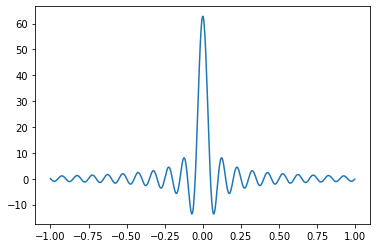

In [43]:
# sygnał
x, y = sinus(1, -1, 1, 360, 10, 0)
plt.plot(x, y)

360
[        nan 62.51334396 61.5636258  60.         57.85088487 55.1551999
 51.96152423 48.32704907 44.31634889 40.        ]


C:\Users\X\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


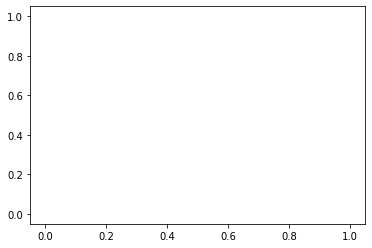

In [41]:
#widmo
print(len(y))
y_ = mydft(y)
plt.plot(x, y_)
print(y[0:10])